## 用户指南

这个用户指南会协助你学会一些matplotlib基本的使用和最佳实践，以帮助你能快速上手matplotlib。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

一个Figure 包含一个或多个Axes,一个Axes可以二维的x-y坐标，也可以是x-y-z 3D的图像，可以使用pyplot.subplots()创建至少含有一个axes的figure，接着可以使用Axes.plot在axes上画出数据对应的图像。

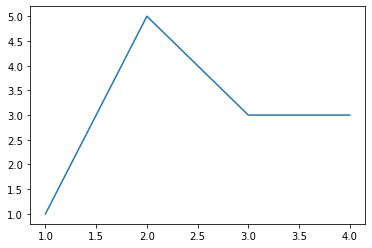

In [2]:
# plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot
# plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.
fig, ax = plt.subplots() #创建figure和一个axes
ax.plot([1,2,3,4],[1,5,3,3]) # 为这个axes值x-y数据
plt.show()

### 1、Matplotlib的Figure架构图 

![image.png](./images/Matplotlib-structure-figure.jpg)

### 2、关键类介绍

#### 2.1、Figure

一个figure可以包含任意多个Axes，下面用pyplot创建一个最简单的figure

它是用来创建 总画布:figure “窗口”的，有figure就可以在上边（或其中一个子网格:subplot上）作图了，（fig：是figure的缩写）。

plt.subplot(111)是plt.subplot(1, 1, 1)另一个写法而已，更完整的写法是  plt.subplot(nrows=1, ncols=1, index=1 ) 

fig, ax = plt.subplots()等价于fig, ax = plt.subplots(11)

fig, axes = plt.subplots(23)：即表示一次性在figure上创建成2*3的网格，使用plt.subplot()只能一个一个的添加：

<Figure size 432x288 with 0 Axes>

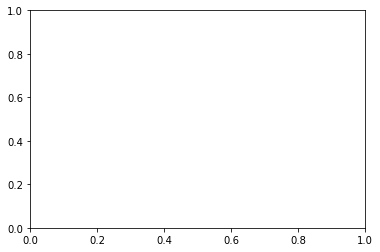

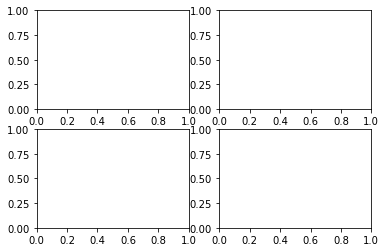

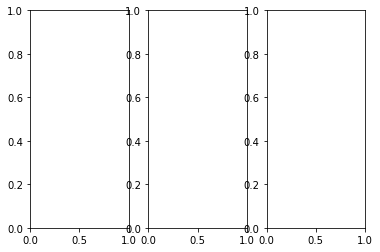

In [3]:
fig = plt.figure() # 创建一个不包含Axes的空figure
fig, ax = plt.subplots() # 创建一个只包含一个Axes的figure
fig, axs = plt.subplots(2, 2) # 创建一个包含2 * 2网格的Axes的figure
fig, axss = plt.subplots(1, 3) # 创建一个包含1 * 3网格的Axes的figure
plt.show()

#### 2.2、Axes

一个plot就是一个带着数据的图像区域，一个figure可以包含多个Axes，但一个Axes只能对应一个figure，一个Axes包含两个Axis（请注意Axes与Axis的不同），注意 data可以通过 axes.Axes.set_xlim() and axes.Axes.set_ylim() 两个方法加以限制。每一个Axes可以通过set_title()来设置标题，通过set_xlabel()设置x轴的标签，通过set_ylabel()设置y轴的标签。

#### 2.3、Axis

In [4]:
# 现在还不太理解，后补

#### 2.4、Artist

In [5]:
# 现在还不太理解，后补

plot的输入，除了numpy.array 或者 numpy.ma.masked_array 还有 pandas 和 numpy.matrix 最好都转成 numpy.array 再输入plot函数

In [6]:
# 例如: pandas.DataFrame转array
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values
a_asarray

array([[0.08503294, 0.88902749, 0.95465217, 0.52653718, 0.91426868],
       [0.37112734, 0.8896478 , 0.03459876, 0.96942064, 0.54983022],
       [0.36245563, 0.61364835, 0.27476762, 0.02593725, 0.28570568],
       [0.43240726, 0.87786718, 0.16440117, 0.27268645, 0.0238088 ]])

In [7]:
# 例如： numpy.matrix 转 array
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

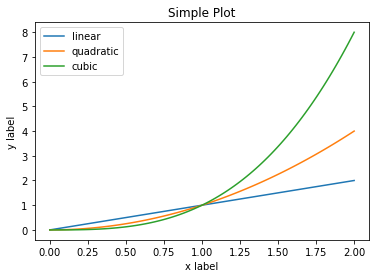

In [7]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
# 格式: ax.plot(x, y, label='xxx')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [8]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

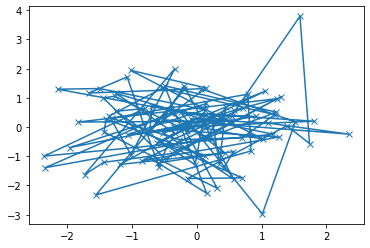

In [10]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
# data1相当于x,data2相当于y 
# 'marker' : 'x'表示线的拐点为 x
my_plotter(ax, data1, data2, {'marker': 'x'})

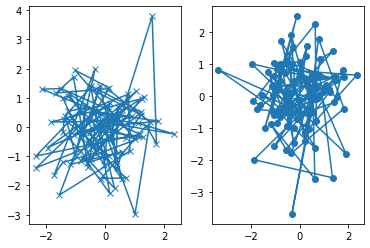

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

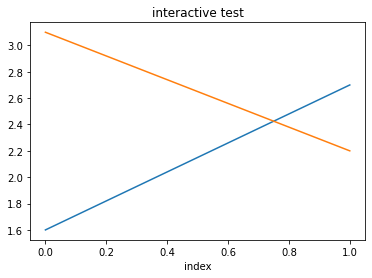

In [16]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])
plt.title("interactive test")
plt.xlabel("index")
ax = plt.gca()
ax.plot([3.1, 2.2])
plt.draw()

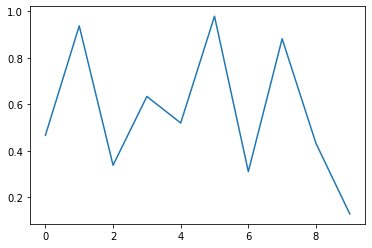

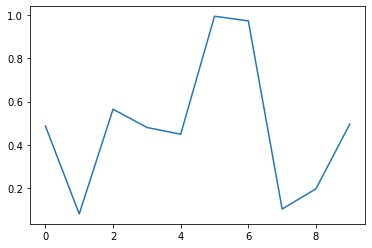

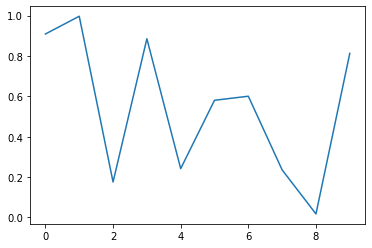

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

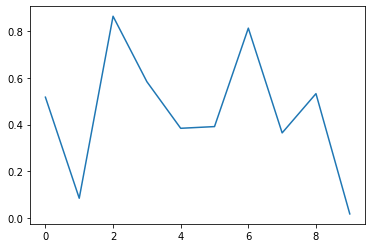

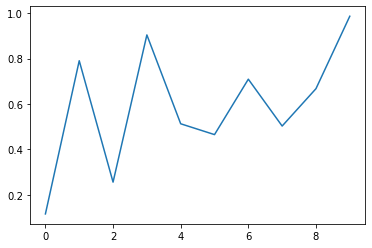

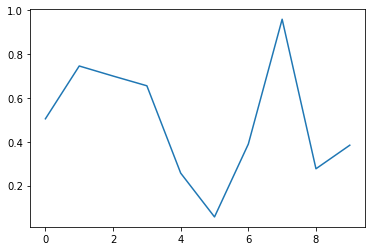

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

## 性能

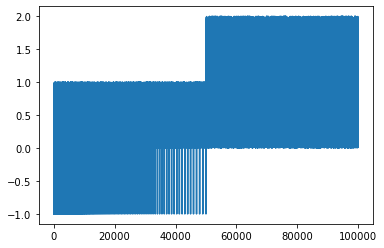

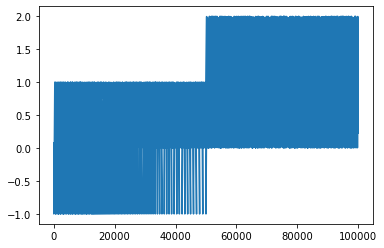

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

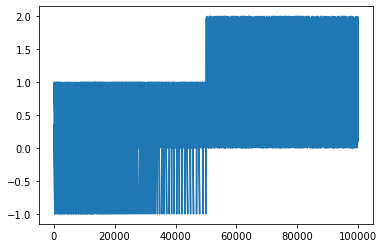

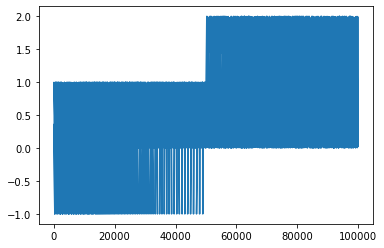

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

## 图例

In [21]:
import matplotlib.style as mplstyle
mplstyle.use('fast')
mplstyle.use(['dark_background', 'ggplot', 'fast'])